# TASK 1: TITANIC SURVIVAL PREDICTION

Done by: Safura Motala 

Batch: NOV BATCH A17

Domain: Data Science

Aim: To build a model that predicts whether a passenger on the Titanic survived or not.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
# Data loading 
titanic=pd.read_csv("titanic_tested.csv")

# Basic Data Inspection 

In [3]:
#Display of top rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.shape

(418, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data Cleaning 

In [6]:
#Checking for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#Drop column with alot of missing values
titanic=titanic.drop(columns='Cabin',axis=1)

In [8]:
#Fill column with missing values
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace = True)

In [9]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Visualisation and Analysis

In [10]:
#Analysis of the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
#Analysis of how many people survived in the titanic 
titanic['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

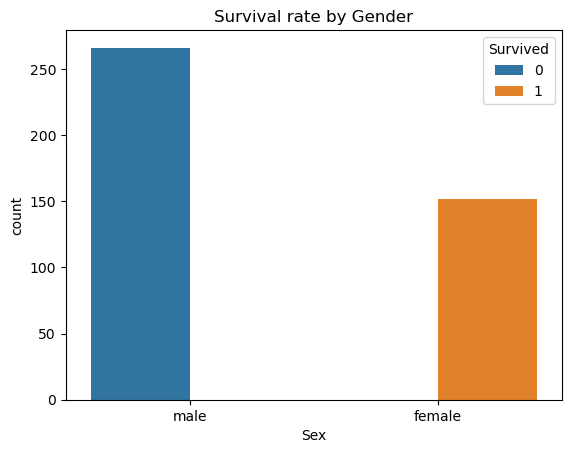

In [12]:
#Data Visualisation showing survival rate by gender
sns.countplot(x='Sex',data=titanic,hue='Survived')
plt.title('Survival rate by Gender')
plt.show()

#This count plot shows that there is a higer rate of female survival which could be because they where given priority during evacuation when the titanic sank.Therefore gender might have played a role in survival. 


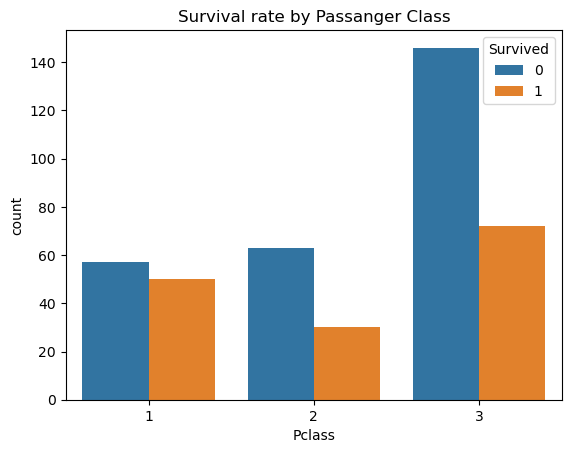

In [13]:
sns.countplot(x='Pclass',data=titanic,hue='Survived')
plt.title('Survival rate by Passanger Class')
plt.show()

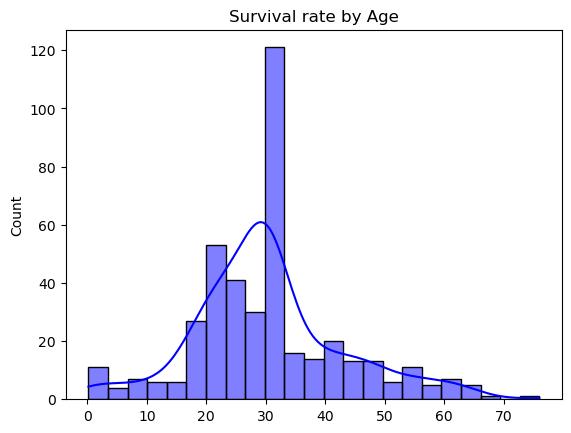

In [14]:
#histogram- data distribution of age amoung survivors and non-survivors.
x=titanic['Age'].values
sns.histplot(x,color='blue',kde=True)
plt.title('Survival rate by Age')
plt.show()

In [15]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [16]:
#Removing unnesessary columns
columns_to_remove = ['PassengerId', 'Name','Ticket','Embarked','Fare']
titanic.drop(columns=columns_to_remove, inplace=True)

In [17]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,34.5,0,0
1,1,3,female,47.0,1,0
2,0,2,male,62.0,0,0
3,0,3,male,27.0,0,0
4,1,3,female,22.0,1,1


In [18]:
# converting the Sex column into 1 and 2
titanic.replace({'Sex':{'male':1,'female':2}}, inplace = True)

In [19]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,34.5,0,0
1,1,3,2,47.0,1,0
2,0,2,1,62.0,0,0
3,0,3,1,27.0,0,0
4,1,3,2,22.0,1,1


# Model Training

In [20]:
titanic_features=titanic.columns.values[1:].tolist()
titanic_features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

In [21]:
X=titanic[titanic_features].values
Y=titanic['Survived']
X

array([[ 3.        ,  1.        , 34.5       ,  0.        ,  0.        ],
       [ 3.        ,  2.        , 47.        ,  1.        ,  0.        ],
       [ 2.        ,  1.        , 62.        ,  0.        ,  0.        ],
       ...,
       [ 3.        ,  1.        , 38.5       ,  0.        ,  0.        ],
       [ 3.        ,  1.        , 30.27259036,  0.        ,  0.        ],
       [ 3.        ,  1.        , 30.27259036,  1.        ,  1.        ]])

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((250, 5), (168, 5), (250,), (168,))

In [24]:
model=LogisticRegression()
model.fit(X,Y)
new =[[ 3,1,34.5,0,0]]
predict=model.predict(new)
if(predict)==0:
    print("Dead")
else:
    print("Alive")

Dead


# Model Evaluation

In [25]:
model=LogisticRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
accuracy=accuracy_score(y_test,predict)
precision=precision_score(y_test,predict)
recall=recall_score(y_test,predict)
f1=f1_score(y_test,predict)
print('accuracy score:',accuracy,'\n','precision score:',precision,'\n','recall score:',recall,'\n','f1 score:',f1)

accuracy score: 1.0 
 precision score: 1.0 
 recall score: 1.0 
 f1 score: 1.0
